# Usage (details: policy measures)
Here, we will analyse the relationship of policy measures and parameter values of SIR-derived ODE models. Policy measures are tracked by [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker).

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
from pprint import pprint

In [3]:
import covsirphy as cs
cs.__version__

'2.7.3-beta.new.202.203.206.fix.210.212'

In [4]:
# Standard users and developers
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=False)
# Population in each country
population_data = data_loader.population(verbose=False)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=False)
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

## Class for policy measure analysis
We will `PolicyMeasures` class to find relationship of policy measures and parameter values of SIR-derived ODE models.

In [5]:
# Create analyser with tau value 360 [min] (can be changed)
analyser = cs.PolicyMeasures(jhu_data, population_data, oxcgrt_data, tau=360)
# The number of registerd countries
len(analyser.countries)

184

In [6]:
# We can get Scenario instance for detailed scenario analysis
type(analyser.scenario("Japan"))

covsirphy.analysis.scenario.Scenario

## Set phases with S-R trend analysis
We will perform S-R trend analysis to set phases in all countries. Countries which do not have **9th phases** will be un-registered for the next analysis. This number will be adjusted for your analysis.

In [7]:
# Show the number of phases of all countries
analyser.trend()
pprint(analyser.phase_len(), compact=True)

{

2

: 

['Belize', 'Papua New Guinea', 'Seychelles', 'Namibia']

,
 

3

: 

[

'Trinidad and Tobago'

, 

'Fiji'

, 

'Tanzania'

, 

'Bahamas'

, 

'Lesotho'

,
     

'Antigua and Barbuda'

, 

'Zimbabwe'

, 

'Mauritius'

, 

'Gambia'

, 

'Brunei'

]

,
 

4

: 

[

'Malta'

, 

'Grenada'

, 

'South Sudan'

, 

'Ireland'

, 

'Palestine'

, 

'Yemen'

,
     

'Kyrgyzstan'

, 

'Equatorial Guinea'

, 

'Libya'

, 

'New Zealand'

,
     

'Sao Tome and Principe'

, 

'Vietnam'

, 

'Norway'

, 

'Zambia'

, 

'Montenegro'

,
     

'Angola'

, 

'Central African Republic'

, 

'Eritrea'

, 

'Botswana'

,
     

'Saint Lucia'

]

,
 

5

: 

[

'Guyana'

, 

'Saint Vincent and the Grenadines'

, 

'Guatemala'

, 

'Mongolia'

,
     

'Ethiopia'

, 

'Chad'

, 

'Malawi'

, 

'Venezuela'

, 

'Kazakhstan'

, 

'Morocco'

,
     

'Liechtenstein'

, 

'Philippines'

, 

'Iceland'

, 

'Maldives'

, 

'Kosovo'

,
     

'Australia'

, 

'Lebanon'

, 

'San Marino'

, 

'Madagascar'

, 

'Japan'

, 

'Israel'

,
     

'Paraguay'

, 

'Costa Rica'

, 

'Suriname'

, 

'Comoros'

, 

'Syria'

]

,
 

6

: 

[

'Thailand'

, 

'Somalia'

, 

'Luxembourg'

, 

'Spain'

, 

'Cambodia'

, 

'Afghanistan'

,
     

'Argentina'

, 

'Nepal'

, 

'Haiti'

, 

'Croatia'

, 

'Sri Lanka'

, 

'Andorra'

,
     

'Slovakia'

, 

'Burundi'

, 

'Kenya'

, 

'Cyprus'

, 

'Greece'

, 

'Bermuda'

, 

'Oman'

,
     

'Guinea-Bissau'

, 

'Bosnia and Herzegovina'

, 

'Cuba'

, 

'India'

, 

'Tajikistan'

,
     

'Bhutan'

, 

'Qatar'

, 

'Benin'

, 

'Congo'

, 

'Uganda'

, 

'Cameroon'

, 

'Swaziland'

,
     

'Mozambique'

, 

'Uzbekistan'

, 

'Colombia'

, 

'Taiwan'

, 

'Honduras'

]

,
 

7

: 

[

'Uruguay'

, 

'Slovenia'

, 

'Switzerland'

, 

'Netherlands'

, 

'Barbados'

, 

'Panama'

,
     

'South Africa'

, 

'Armenia'

, 

'Rwanda'

, 

'Gabon'

, 

'Chile'

,
     

'Dominican Republic'

, 

'Germany'

, 

'Canada'

, 

'Ghana'

, 

'Cape Verde'

,
     

'Jamaica'

, 

'Iraq'

, 

'Belarus'

, 

'Finland'

, 

'Albania'

, 

'Serbia'

, 

'Latvia'

,
     

'Macedonia'

, 

'El Salvador'

, 

'Sierra Leone'

, 

'Bulgaria'

, 

'Monaco'

, 

'Togo'

,
     

'Burkina Faso'

, 

'Indonesia'

, 

'Azerbaijan'

, 

'Sudan'

, 

'China'

, 

'Egypt'

,
     

'Djibouti'

, 

'Pakistan'

, 

'Niger'

, 

'Jordan'

, 

'Mauritania'

, 

'Ecuador'

]

,
 

8

: 

[

'Malaysia'

, 

'Belgium'

, 

'Singapore'

, 

'Tunisia'

, 

'Algeria'

, 

'Hungary'

,
     

'Liberia'

, 

'Estonia'

, 

'Denmark'

, 

'Austria'

, 

'Lithuania'

, 

'Bolivia'

,
     

'Ukraine'

, 

'Romania'

, 

'Brazil'

, 

'Saudi Arabia'

, 

'Nicaragua'

]

,
 

9

: 

[

'Peru'

, 

'Italy'

, 

'Moldova'

, 

'France'

, 

'Myanmar'

, 

'United States'

, 

'Mali'

,
     

'Russia'

, 

'Nigeria'

, 

'Georgia'

, 

'Mexico'

, 

'Portugal'

, 

'Czech Republic'

,
     

'Turkey'

, 

'Kuwait'

, 

'Bangladesh'

]

,
 

10

: 

[

'Iran'

, 

'Guinea'

, 

'Senegal'

, 

'United Arab Emirates'

, 

'Korea, South'

,
      

'Bahrain'

, 

'Poland'

]

}

In [8]:
# Set phases with S-R trend analysis
analyser.trend(min_len=9)
# The number of countries
len(analyser.countries)

23

In [9]:
phase_len_dict = analyser.phase_len()
pprint(phase_len_dict, compact=True)

{

9

: 

[

'Peru'

, 

'Italy'

, 

'Moldova'

, 

'France'

, 

'Myanmar'

, 

'United States'

, 

'Mali'

,
     

'Russia'

, 

'Nigeria'

, 

'Georgia'

, 

'Mexico'

, 

'Portugal'

, 

'Czech Republic'

,
     

'Turkey'

, 

'Kuwait'

, 

'Bangladesh'

]

,
 

10

: 

[

'Iran'

, 

'Guinea'

, 

'Senegal'

, 

'United Arab Emirates'

, 

'Korea, South'

,
      

'Bahrain'

, 

'Poland'

]

}

In [10]:
# Here, only show the countries which have the most phases
countries_show = max(phase_len_dict.items(), key=lambda x: x[0])[1]
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population
Country Phase                                        
Iran    1st    Past  29Mar2020  16Apr2020    81800269
        2nd    Past  17Apr2020  10May2020    81800269
        3rd    Past  11May2020  28May2020    81800269
        4th    Past  29May2020  10Jun2020    81800269
        5th    Past  11Jun2020  22Jun2020    81800269
...             ...        ...        ...         ...
Poland  6th    Past  01Jul2020  15Jul2020    37974750
        7th    Past  16Jul2020  27Jul2020    37974750
        8th    Past  28Jul2020  07Aug2020    37974750
        9th    Past  08Aug2020  16Aug2020    37974750
        10th   Past  17Aug2020  27Aug2020    37974750

[70 rows x 4 columns]

## Parameter estimation
we will estimate the parameter values with SIR-derived ODE models in each country.

In [11]:
# Parameter estimation with SIR-F model
analyser.estimate(cs.SIRF)


<SIR-F model: parameter estimation>

Running optimization with 4 CPUs...

	POL,  6th phase (01Jul2020 - 15Jul2020): finished  265 trials in 0 min 10 sec

	MEX,  1st phase (21May2020 - 07Jun2020): finished  506 trials in 0 min 20 sec

	BHR,  3rd phase (11Jun2020 - 20Jun2020): finished  855 trials in 0 min 35 sec

	MDA,  5th phase (09Jul2020 - 20Jul2020): finished  422 trials in 0 min 15 sec

	ARE,  9th phase (25Jul2020 - 09Aug2020): finished  491 trials in 0 min 20 sec

	GEO,  3rd phase (14May2020 - 29May2020): finished 1290 trials in 1 min  0 sec

	GEO,  7th phase (21Jul2020 - 05Aug2020): finished 1322 trials in 1 min  0 sec

	MLI,  5th phase (02Jun2020 - 09Jun2020): finished  834 trials in 0 min 35 sec

	FRA,  5th phase (06May2020 - 26May2020): finished  418 trials in 0 min 15 sec

	ITA,  4th phase (21Apr2020 - 01May2020): finished  152 trials in 0 min  5 sec

	MMR,  2nd phase (15May2020 - 25May2020): finished  547 trials in 0 min 20 sec

	USA,  5th phase (08Jul2020 - 15Jul2020): finished  414 trials in 0 min 15 sec

	BHR,  2nd phase (31May2020 - 10Jun2020): finished 1349 trials in 1 min  0 sec

	IRN, 10th phase (12Aug2020 - 27Aug2020): finished  413 trials in 0 min 15 sec

	MMR,  3rd phase (26May2020 - 05Jun2020): finished 1377 trials in 1 min  0 sec

	ITA,  2nd phase (01Apr2020 - 11Apr2020): finished 1075 trials in 0 min 45 sec

	ITA,  5th phase (02May2020 - 10May2020): finished  429 trials in 0 min 15 sec

	KOR,  3rd phase (07Apr2020 - 29Apr2020): finished 1333 trials in 1 min  0 sec

	ITA,  7th phase (21May2020 - 08Jun2020): finished  284 trials in 0 min 10 sec

	GEO,  4th phase (30May2020 - 10Jun2020): finished 1339 trials in 1 min  0 sec

	KWT,  7th phase (24Jul2020 - 03Aug2020): finished  154 trials in 0 min  5 sec

	USA,  4th phase (26Jun2020 - 07Jul2020): finished 1346 trials in 1 min  0 sec

	RUS,  6th phase (05Jul2020 - 15Jul2020): finished 1353 trials in 1 min  0 sec

	PER,  3rd phase (11Jun2020 - 22Jun2020): finished 1337 trials in 1 min  0 sec

	MMR,  5th phase (15Jun2020 - 27Jun2020): finished 1285 trials in 1 min  0 sec

	PER,  9th phase (19Aug2020 - 27Aug2020): finished 1273 trials in 1 min  0 sec

	SEN,  8th phase (22Jul2020 - 01Aug2020): finished  970 trials in 0 min 45 sec

	PRT,  9th phase (11Aug2020 - 27Aug2020): finished 1241 trials in 1 min  0 sec

	POL,  3rd phase (22May2020 - 04Jun2020): finished  383 trials in 0 min 15 sec

	ARE,  8th phase (11Jul2020 - 24Jul2020): finished  995 trials in 0 min 45 sec

	PER,  8th phase (06Aug2020 - 18Aug2020): finished 1274 trials in 1 min  0 sec

	USA,  2nd phase (12May2020 - 04Jun2020): finished 1263 trials in 1 min  0 sec

	ITA,  1st phase (23Mar2020 - 31Mar2020): finished 1268 trials in 1 min  0 sec

	GEO,  5th phase (11Jun2020 - 06Jul2020): finished 1269 trials in 1 min  0 sec

	FRA,  3rd phase (12Apr2020 - 24Apr2020): finished 1243 trials in 1 min  0 sec

	PRT,  6th phase (03Jul2020 - 11Jul2020): finished  527 trials in 0 min 20 sec

	POL,  9th phase (08Aug2020 - 16Aug2020): finished  151 trials in 0 min  5 sec

	TUR,  2nd phase (30Apr2020 - 15May2020): finished  540 trials in 0 min 20 sec

	BHR,  1st phase (06May2020 - 30May2020): finished 1298 trials in 1 min  0 sec

	PRT,  7th phase (12Jul2020 - 23Jul2020): finished  286 trials in 0 min 10 sec

	CZE,  7th phase (27Jul2020 - 04Aug2020): finished 1326 trials in 1 min  0 sec

	TUR,  3rd phase (16May2020 - 28May2020): finished  414 trials in 0 min 15 sec

	KWT,  8th phase (04Aug2020 - 14Aug2020): finished  529 trials in 0 min 20 sec

	KWT,  2nd phase (25May2020 - 09Jun2020): finished 1307 trials in 1 min  0 sec

	MMR,  6th phase (28Jun2020 - 08Jul2020): finished 1325 trials in 1 min  0 sec

	USA,  7th phase (24Jul2020 - 07Aug2020): finished  280 trials in 0 min 10 sec

	POL,  1st phase (24Apr2020 - 08May2020): finished 1289 trials in 1 min  0 sec

	MDA,  9th phase (18Aug2020 - 27Aug2020): finished 1314 trials in 1 min  0 sec

	PRT,  3rd phase (01Jun2020 - 12Jun2020): finished  504 trials in 0 min 20 sec

	MLI,  4th phase (25May2020 - 01Jun2020): finished  512 trials in 0 min 20 sec

	MDA,  7th phase (30Jul2020 - 07Aug2020): finished 1293 trials in 1 min  0 sec

	ARE,  3rd phase (26May2020 - 03Jun2020): finished  993 trials in 0 min 45 sec

	KOR,  6th phase (17Jun2020 - 02Jul2020): finished 1252 trials in 1 min  0 sec

	SEN,  9th phase (02Aug2020 - 12Aug2020): finished 1279 trials in 1 min  0 sec

	KOR,  1st phase (15Mar2020 - 25Mar2020): finished 1278 trials in 1 min  0 sec

	BHR,  6th phase (07Jul2020 - 14Jul2020): finished 1285 trials in 1 min  0 sec

	TUR,  6th phase (27Jun2020 - 11Jul2020): finished  280 trials in 0 min 10 sec

	BHR,  4th phase (21Jun2020 - 28Jun2020): finished 1310 trials in 1 min  0 sec

	IRN,  6th phase (23Jun2020 - 04Jul2020): finished  153 trials in 0 min  5 sec

	KOR,  4th phase (30Apr2020 - 23May2020): finished  292 trials in 0 min 10 sec

	KOR,  2nd phase (26Mar2020 - 06Apr2020): finished  526 trials in 0 min 20 sec

	MDA,  3rd phase (16Jun2020 - 25Jun2020): finished  395 trials in 0 min 15 sec

	MLI,  6th phase (10Jun2020 - 24Jun2020): finished 1277 trials in 1 min  0 sec

	ITA,  6th phase (11May2020 - 20May2020): finished  146 trials in 0 min  5 sec

	PRT,  2nd phase (18May2020 - 31May2020): finished 1277 trials in 1 min  0 sec

	TUR,  7th phase (12Jul2020 - 29Jul2020): finished  118 trials in 0 min  5 sec

	KWT,  6th phase (14Jul2020 - 23Jul2020): finished  334 trials in 0 min 15 sec

	MEX,  5th phase (09Jul2020 - 16Jul2020): finished 1181 trials in 1 min  0 sec

	SEN,  1st phase (01May2020 - 14May2020): finished 1152 trials in 1 min  0 sec

	PER,  4th phase (23Jun2020 - 06Jul2020): finished 1078 trials in 1 min  0 sec

	IRN,  7th phase (05Jul2020 - 16Jul2020): finished  137 trials in 0 min  5 sec

	MEX,  3rd phase (20Jun2020 - 30Jun2020): finished 1152 trials in 1 min  0 sec

	GIN,  9th phase (06Aug2020 - 16Aug2020): finished 1180 trials in 1 min  0 sec

	MLI,  9th phase (01Aug2020 - 27Aug2020): finished 1213 trials in 1 min  0 sec

	FRA,  9th phase (02Aug2020 - 27Aug2020): finished  673 trials in 0 min 25 sec

	CZE,  4th phase (10Jun2020 - 27Jun2020): finished 1300 trials in 1 min  0 sec

	SEN,  4th phase (09Jun2020 - 19Jun2020): finished 1284 trials in 1 min  0 sec

	KWT,  1st phase (12May2020 - 24May2020): finished 1257 trials in 1 min  0 sec

	MMR,  8th phase (25Jul2020 - 15Aug2020): finished  637 trials in 0 min 25 sec

	MDA,  2nd phase (03Jun2020 - 15Jun2020): finished 1265 trials in 1 min  0 sec

	FRA,  8th phase (13Jul2020 - 01Aug2020): finished  525 trials in 0 min 20 sec

	ARE,  1st phase (27Apr2020 - 12May2020): finished 1273 trials in 1 min  0 sec

	POL,  2nd phase (09May2020 - 21May2020): finished  375 trials in 0 min 15 sec

	KWT,  4th phase (23Jun2020 - 03Jul2020): finished 1291 trials in 1 min  0 sec

	MLI,  1st phase (25Apr2020 - 02May2020): finished 1257 trials in 1 min  0 sec

	SEN,  3rd phase (28May2020 - 08Jun2020): finished 1250 trials in 1 min  0 sec

	MDA,  8th phase (08Aug2020 - 17Aug2020): finished  346 trials in 0 min 15 sec

	GIN,  1st phase (02May2020 - 12May2020): finished 1272 trials in 1 min  0 sec

	NGA,  3rd phase (20Jun2020 - 27Jun2020): finished  555 trials in 0 min 25 sec

	TUR,  1st phase (18Apr2020 - 29Apr2020): finished 1197 trials in 1 min  0 sec

	SEN,  7th phase (11Jul2020 - 21Jul2020): finished 1224 trials in 1 min  0 sec

	BHR,  5th phase (29Jun2020 - 06Jul2020): finished 1217 trials in 1 min  0 sec

	PRT,  1st phase (04May2020 - 17May2020): finished 1295 trials in 1 min  0 sec

	SEN,  5th phase (20Jun2020 - 01Jul2020): finished  826 trials in 0 min 35 sec

	PER,  7th phase (29Jul2020 - 05Aug2020): finished 1284 trials in 1 min  0 sec

	KWT,  5th phase (04Jul2020 - 13Jul2020): finished  278 trials in 0 min 10 sec

	RUS,  1st phase (08May2020 - 22May2020): finished 1273 trials in 1 min  0 sec

	TUR,  9th phase (14Aug2020 - 27Aug2020): finished  276 trials in 0 min 10 sec

	CZE,  5th phase (28Jun2020 - 16Jul2020): finished 1248 trials in 1 min  0 sec

	FRA,  2nd phase (03Apr2020 - 11Apr2020): finished 1285 trials in 1 min  0 sec

	SEN, 10th phase (13Aug2020 - 27Aug2020): finished 1274 trials in 1 min  0 sec

	MDA,  6th phase (21Jul2020 - 29Jul2020): finished  256 trials in 0 min 10 sec

	GIN,  6th phase (02Jul2020 - 14Jul2020): finished 1260 trials in 1 min  0 sec

	BGD,  1st phase (27May2020 - 11Jun2020): finished 1246 trials in 1 min  0 sec

	PER,  5th phase (07Jul2020 - 18Jul2020): finished 1264 trials in 1 min  0 sec

	GEO,  2nd phase (24Apr2020 - 13May2020): finished 1230 trials in 1 min  0 sec

	IRN,  2nd phase (17Apr2020 - 10May2020): finished  126 trials in 0 min  5 sec

	CZE,  3rd phase (13May2020 - 09Jun2020): finished 1209 trials in 1 min  0 sec

	USA,  3rd phase (05Jun2020 - 25Jun2020): finished 1206 trials in 1 min  0 sec

	MLI,  2nd phase (03May2020 - 14May2020): finished 1223 trials in 1 min  0 sec

	NGA,  1st phase (24May2020 - 08Jun2020): finished  777 trials in 0 min 35 sec

	ARE,  6th phase (23Jun2020 - 02Jul2020): finished  486 trials in 0 min 20 sec

	MMR,  7th phase (09Jul2020 - 24Jul2020): finished 1204 trials in 1 min  0 sec

	NGA,  5th phase (13Jul2020 - 20Jul2020): finished  365 trials in 0 min 15 sec

	GEO,  6th phase (07Jul2020 - 20Jul2020): finished 1213 trials in 1 min  0 sec

	GIN, 10th phase (17Aug2020 - 27Aug2020): finished 1207 trials in 1 min  0 sec

	PRT,  4th phase (13Jun2020 - 22Jun2020): finished  369 trials in 0 min 15 sec

	ARE,  2nd phase (13May2020 - 25May2020): finished 1208 trials in 1 min  0 sec

	MLI,  7th phase (25Jun2020 - 03Jul2020): finished  371 trials in 0 min 15 sec

	FRA,  7th phase (20Jun2020 - 12Jul2020): finished  575 trials in 0 min 25 sec

	NGA,  4th phase (28Jun2020 - 12Jul2020): finished  670 trials in 0 min 30 sec

	POL,  4th phase (05Jun2020 - 16Jun2020): finished 1194 trials in 1 min  0 sec

	ARE,  7th phase (03Jul2020 - 10Jul2020): finished 1192 trials in 1 min  0 sec

	TUR,  8th phase (30Jul2020 - 13Aug2020): finished  584 trials in 0 min 25 sec

	ITA,  9th phase (21Jul2020 - 27Aug2020): finished 1184 trials in 1 min  0 sec

	GIN,  4th phase (31May2020 - 15Jun2020): finished 1213 trials in 1 min  0 sec

	PER,  1st phase (11May2020 - 28May2020): finished 1218 trials in 1 min  0 sec

	MEX,  2nd phase (08Jun2020 - 19Jun2020): finished  871 trials in 0 min 40 sec

	SEN,  2nd phase (15May2020 - 27May2020): finished 1201 trials in 1 min  0 sec

	ITA,  8th phase (09Jun2020 - 20Jul2020): finished  567 trials in 0 min 25 sec

	KOR,  9th phase (04Aug2020 - 16Aug2020): finished 1209 trials in 1 min  0 sec

	FRA,  1st phase (25Mar2020 - 02Apr2020): finished 1212 trials in 1 min  0 sec

	USA,  8th phase (08Aug2020 - 15Aug2020): finished  485 trials in 0 min 20 sec

	MDA,  1st phase (09May2020 - 02Jun2020): finished 1216 trials in 1 min  0 sec

	SEN,  6th phase (02Jul2020 - 10Jul2020): finished 1234 trials in 1 min  0 sec

	BGD,  2nd phase (12Jun2020 - 20Jun2020): finished 1257 trials in 1 min  0 sec

	TUR,  5th phase (14Jun2020 - 26Jun2020): finished  507 trials in 0 min 20 sec

	POL,  5th phase (17Jun2020 - 30Jun2020): finished  250 trials in 0 min 10 sec

	ITA,  3rd phase (12Apr2020 - 20Apr2020): finished  147 trials in 0 min  5 sec

	RUS,  7th phase (16Jul2020 - 27Jul2020): finished 1255 trials in 1 min  0 sec

	KOR,  8th phase (21Jul2020 - 03Aug2020): finished 1241 trials in 1 min  0 sec

	GIN,  7th phase (15Jul2020 - 24Jul2020): finished 1290 trials in 1 min  0 sec

	USA,  1st phase (20Apr2020 - 11May2020): finished 1298 trials in 1 min  0 sec

	FRA,  6th phase (27May2020 - 19Jun2020): finished 1289 trials in 1 min  0 sec

	CZE,  6th phase (17Jul2020 - 26Jul2020): finished 1307 trials in 1 min  0 sec

	MEX,  4th phase (01Jul2020 - 08Jul2020): finished  275 trials in 0 min 10 sec

	GIN,  5th phase (16Jun2020 - 01Jul2020): finished 1258 trials in 1 min  0 sec

	MLI,  8th phase (04Jul2020 - 31Jul2020): finished 1260 trials in 1 min  0 sec

	BHR,  8th phase (25Jul2020 - 04Aug2020): finished  242 trials in 0 min 10 sec

	RUS,  8th phase (28Jul2020 - 09Aug2020): finished 1236 trials in 1 min  0 sec

	IRN,  1st phase (29Mar2020 - 16Apr2020): finished 1261 trials in 1 min  0 sec

	USA,  6th phase (16Jul2020 - 23Jul2020): finished  150 trials in 0 min  5 sec

	PRT,  8th phase (24Jul2020 - 10Aug2020): finished  612 trials in 0 min 25 sec

	KOR,  7th phase (03Jul2020 - 20Jul2020): finished 1278 trials in 1 min  0 sec

	KWT,  3rd phase (10Jun2020 - 22Jun2020): finished  628 trials in 0 min 25 sec

	MDA,  4th phase (26Jun2020 - 08Jul2020): finished 1258 trials in 1 min  0 sec

	ARE,  4th phase (04Jun2020 - 11Jun2020): finished  989 trials in 0 min 45 sec

	IRN,  9th phase (29Jul2020 - 11Aug2020): finished  274 trials in 0 min 10 sec

	KOR,  5th phase (24May2020 - 16Jun2020): finished  867 trials in 0 min 40 sec

	CZE,  2nd phase (20Apr2020 - 12May2020): finished 1241 trials in 1 min  0 sec

	BHR,  9th phase (05Aug2020 - 15Aug2020): finished 1277 trials in 1 min  0 sec

	MLI,  3rd phase (15May2020 - 24May2020): finished 1288 trials in 1 min  0 sec

	GIN,  3rd phase (23May2020 - 30May2020): finished 1301 trials in 1 min  0 sec

	CZE,  1st phase (08Apr2020 - 19Apr2020): finished 1317 trials in 1 min  0 sec

	RUS,  5th phase (24Jun2020 - 04Jul2020): finished 1353 trials in 1 min  0 sec

	ARE,  5th phase (12Jun2020 - 22Jun2020): finished 1030 trials in 0 min 40 sec

	MMR,  4th phase (06Jun2020 - 14Jun2020): finished 1471 trials in 1 min  0 sec

	MMR,  1st phase (29Apr2020 - 14May2020): finished 1425 trials in 1 min  0 sec

	RUS,  3rd phase (31May2020 - 14Jun2020): finished 1444 trials in 1 min  0 sec

	GIN,  2nd phase (13May2020 - 22May2020): finished 1377 trials in 1 min  0 sec

	PER,  2nd phase (29May2020 - 10Jun2020): finished 1333 trials in 1 min  0 sec

	CZE,  8th phase (05Aug2020 - 18Aug2020): finished 1289 trials in 1 min  0 sec

	IRN,  8th phase (17Jul2020 - 28Jul2020): finished  271 trials in 0 min 10 sec

	GEO,  1st phase (12Apr2020 - 23Apr2020): finished 1261 trials in 1 min  0 sec

	GEO,  9th phase (15Aug2020 - 27Aug2020): finished 1216 trials in 1 min  0 sec

	MMR,  9th phase (16Aug2020 - 27Aug2020): finished 1258 trials in 1 min  0 sec

	PER,  6th phase (19Jul2020 - 28Jul2020): finished 1279 trials in 1 min  0 sec

	GEO,  8th phase (06Aug2020 - 14Aug2020): finished 1385 trials in 1 min  0 sec

	GIN,  8th phase (25Jul2020 - 05Aug2020): finished 1356 trials in 1 min  0 sec

	RUS,  9th phase (10Aug2020 - 27Aug2020): finished 1348 trials in 1 min  0 sec

	FRA,  4th phase (25Apr2020 - 05May2020): finished 1412 trials in 1 min  0 sec

	POL,  8th phase (28Jul2020 - 07Aug2020): finished  503 trials in 0 min 15 sec

	RUS,  4th phase (15Jun2020 - 23Jun2020): finished 1539 trials in 1 min  0 sec

	TUR,  4th phase (29May2020 - 13Jun2020): finished  179 trials in 0 min  5 sec

Completed optimization. Total: 37 min 14 sec

In [12]:
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population    ODE    Rt  \
Country Phase                                                        
Iran    1st    Past  29Mar2020  16Apr2020    81800269  SIR-F     1   
        2nd    Past  17Apr2020  10May2020    81800269  SIR-F  0.73   
        3rd    Past  11May2020  28May2020    81800269      -     -   
        4th    Past  29May2020  10Jun2020    81800269      -     -   
        5th    Past  11Jun2020  22Jun2020    81800269      -     -   
...             ...        ...        ...         ...    ...   ...   
Poland  6th    Past  01Jul2020  15Jul2020    37974750  SIR-F   0.7   
        7th    Past  16Jul2020  27Jul2020    37974750      -     -   
        8th    Past  28Jul2020  07Aug2020    37974750  SIR-F  1.89   
        9th    Past  08Aug2020  16Aug2020    37974750  SIR-F  1.96   
        10th   Past  17Aug2020  27Aug2020    37974750      -     -   

                    theta        kappa         rho       sigma  tau  \
Country Phase                                                         
Iran    1st     0.0625077  0.000294334   0.0182478   0.0168904  360   
        2nd     0.0205407  0.000862225   0.0182612   0.0236975  360   
        3rd             -            -           -           -    -   
        4th             -            -           -           -    -   
        5th             -            -           -           -    -   
...                   ...          ...         ...         ...  ...   
Poland  6th     0.0171987  5.91156e-05  0.00766775   0.0107073  360   
        7th             -            -           -           -    -   
        8th    0.00101051  0.000215224   0.0157849  0.00813358  360   
        9th    0.00180556  9.34529e-05    0.012563  0.00631901  360   
        10th            -            -           -           -    -   

              alpha1 [-] 1/gamma [day] 1/beta [day] 1/alpha2 [day]  \
Country Phase                                                        
Iran    1st        0.063            14           13            849   
        2nd        0.021            10           13            289   
        3rd            -             -            -              -   
        4th            -             -            -              -   
        5th            -             -            -              -   
...                  ...           ...          ...            ...   
Poland  6th        0.017            23           32           4229   
        7th            -             -            -              -   
        8th        0.001            30           15           1161   
        9th        0.002            39           19           2675   
        10th           -             -            -              -   

                    RMSLE Trials       Runtime  
Country Phase                                   
Iran    1st      0.259294   1261  1 min  0 sec  
        2nd      0.112466    126  0 min  5 sec  
        3rd             -      -             -  
        4th             -      -             -  
        5th             -      -             -  
...                   ...    ...           ...  
Poland  6th     0.0455457    265  0 min 10 sec  
        7th             -      -             -  
        8th    0.00887099    503  0 min 15 sec  
        9th    0.00615512    151  0 min  5 sec  
        10th            -      -             -  

[70 rows x 18 columns]

## Compare the history of parameters
Here, compare the history of parameter values if countries.

In [13]:
# All parameter/day parameter/Rt/OxCGRT
analyser.track().head()

,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
0,2020-05-11,Peru,0.0143859,0.000234572,0.0113389,0.00545029,0.014,1065,22,45,...,2,4,2,2,2,4,2,2,1,92.59
1,2020-05-11,Peru,0.0143859,0.000234572,0.0113389,0.00545029,0.014,1065,22,45,...,2,4,2,2,2,4,2,2,1,92.59
2,2020-05-11,Peru,0.0143859,0.000234572,0.0113389,0.00545029,0.014,1065,22,45,...,2,4,2,2,2,4,2,2,1,92.59
3,2020-05-11,Peru,0.0143859,0.000234572,0.0113389,0.00545029,0.014,1065,22,45,...,2,4,2,2,2,4,2,2,1,92.59
4,2020-05-11,Peru,0.0143859,0.000234572,0.0113389,0.00545029,0.014,1065,22,45,...,2,4,2,2,2,4,2,2,1,92.59


### $Rt$: Reprodcution number $\mathrm{[-]}$

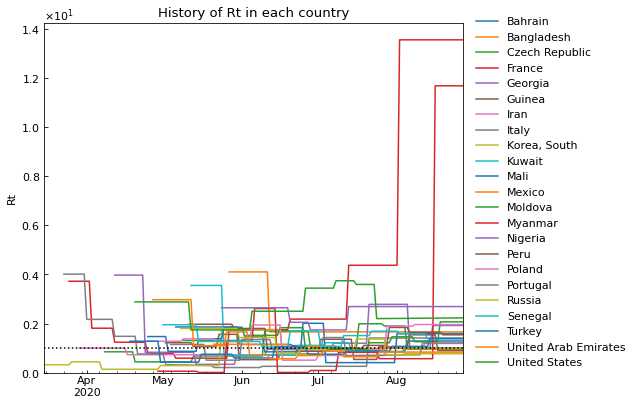

Country,Bahrain,Bangladesh,Czech Republic,France,Georgia,Guinea,Iran,Italy,"Korea, South",Kuwait,...,Myanmar,Nigeria,Peru,Poland,Portugal,Russia,Senegal,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-23,1.29,1.66,0.96,13.54,1.92,0.9,1.19,1.41,0.77,1.01,...,11.67,2.69,1.54,1.96,1.21,0.8,1.38,1.39,0.84,2.23
2020-08-24,1.29,1.66,0.96,13.54,1.92,0.9,1.19,1.41,0.77,1.01,...,11.67,2.69,1.54,1.96,1.21,0.8,1.38,1.39,0.84,2.23
2020-08-25,1.29,1.66,0.96,13.54,1.92,0.9,1.19,1.41,0.77,1.01,...,11.67,2.69,1.54,1.96,1.21,0.8,1.38,1.39,0.84,2.23
2020-08-26,1.29,1.66,0.96,13.54,1.92,0.9,1.19,1.41,0.77,1.01,...,11.67,2.69,1.54,1.96,1.21,0.8,1.38,1.39,0.84,2.23
2020-08-27,1.29,1.66,0.96,13.54,1.92,0.9,1.19,1.41,0.77,1.01,...,11.67,2.69,1.54,1.96,1.21,0.8,1.38,1.39,0.84,2.23


In [14]:
analyser.param_history("Rt", roll_window=None).tail()

### $\rho$: Effective contact rate $\mathrm{[-]}$

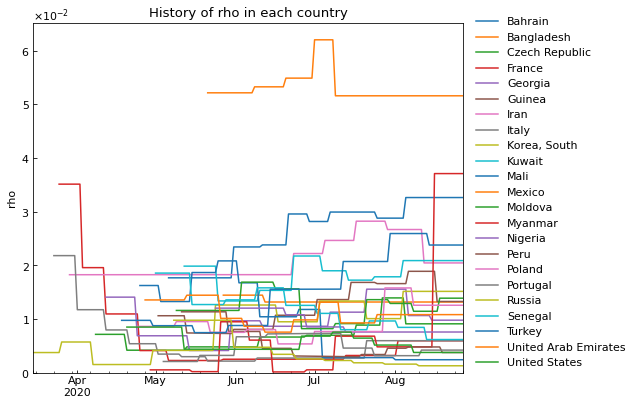

Country,Bahrain,Bangladesh,Czech Republic,France,Georgia,Guinea,Iran,Italy,"Korea, South",Kuwait,...,Myanmar,Nigeria,Peru,Poland,Portugal,Russia,Senegal,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-23,0.032622,0.013165,0.009104,0.005948,0.009779,0.013266,0.020444,0.005963,0.015147,0.02088,...,0.037083,0.007577,0.003758,0.012563,0.004209,0.001291,0.006175,0.023778,0.010816,0.003771
2020-08-24,0.032622,0.013165,0.009104,0.005948,0.009779,0.013266,0.020444,0.005963,0.015147,0.02088,...,0.037083,0.007577,0.003758,0.012563,0.004209,0.001291,0.006175,0.023778,0.010816,0.003771
2020-08-25,0.032622,0.013165,0.009104,0.005948,0.009779,0.013266,0.020444,0.005963,0.015147,0.02088,...,0.037083,0.007577,0.003758,0.012563,0.004209,0.001291,0.006175,0.023778,0.010816,0.003771
2020-08-26,0.032622,0.013165,0.009104,0.005948,0.009779,0.013266,0.020444,0.005963,0.015147,0.02088,...,0.037083,0.007577,0.003758,0.012563,0.004209,0.001291,0.006175,0.023778,0.010816,0.003771
2020-08-27,0.032622,0.013165,0.009104,0.005948,0.009779,0.013266,0.020444,0.005963,0.015147,0.02088,...,0.037083,0.007577,0.003758,0.012563,0.004209,0.001291,0.006175,0.023778,0.010816,0.003771


In [15]:
analyser.param_history("rho", roll_window=None).tail()

### $\sigma$: Recovery rate $\mathrm{[-]}$

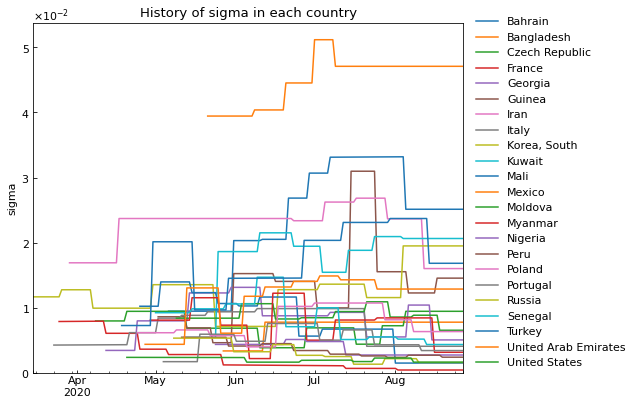

Country,Bahrain,Bangladesh,Czech Republic,France,Georgia,Guinea,Iran,Italy,"Korea, South",Kuwait,...,Myanmar,Nigeria,Peru,Poland,Portugal,Russia,Senegal,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-23,0.02512,0.007765,0.009436,0.000414,0.005038,0.014534,0.016003,0.004063,0.019487,0.020626,...,0.003139,0.00272,0.002384,0.006319,0.003403,0.001567,0.004332,0.016817,0.012857,0.001623
2020-08-24,0.02512,0.007765,0.009436,0.000414,0.005038,0.014534,0.016003,0.004063,0.019487,0.020626,...,0.003139,0.00272,0.002384,0.006319,0.003403,0.001567,0.004332,0.016817,0.012857,0.001623
2020-08-25,0.02512,0.007765,0.009436,0.000414,0.005038,0.014534,0.016003,0.004063,0.019487,0.020626,...,0.003139,0.00272,0.002384,0.006319,0.003403,0.001567,0.004332,0.016817,0.012857,0.001623
2020-08-26,0.02512,0.007765,0.009436,0.000414,0.005038,0.014534,0.016003,0.004063,0.019487,0.020626,...,0.003139,0.00272,0.002384,0.006319,0.003403,0.001567,0.004332,0.016817,0.012857,0.001623
2020-08-27,0.02512,0.007765,0.009436,0.000414,0.005038,0.014534,0.016003,0.004063,0.019487,0.020626,...,0.003139,0.00272,0.002384,0.006319,0.003403,0.001567,0.004332,0.016817,0.012857,0.001623


In [16]:
analyser.param_history("sigma", roll_window=None).tail()

### $\kappa$: Mortality rate of infected cases $\mathrm{[-]}$

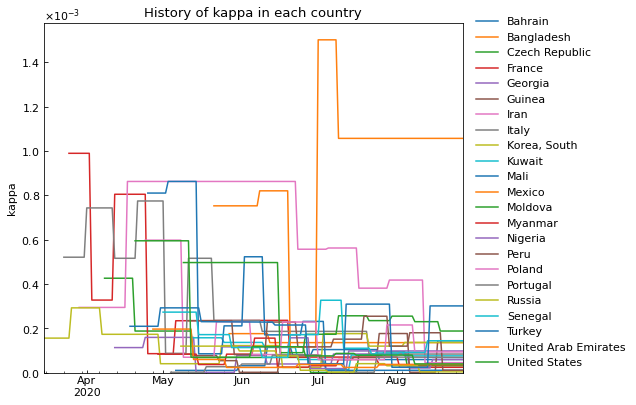

Country,Bahrain,Bangladesh,Czech Republic,France,Georgia,Guinea,Iran,Italy,"Korea, South",Kuwait,...,Myanmar,Nigeria,Peru,Poland,Portugal,Russia,Senegal,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-23,0.000059,0.000136,0.000031,0.000024,0.00006,0.000144,0.000045,0.000084,0.000137,0.000076,...,0.000037,0.000098,0.000011,0.000093,0.000069,0.000004,0.000144,0.000301,0.000037,0.00004
2020-08-24,0.000059,0.000136,0.000031,0.000024,0.00006,0.000144,0.000045,0.000084,0.000137,0.000076,...,0.000037,0.000098,0.000011,0.000093,0.000069,0.000004,0.000144,0.000301,0.000037,0.00004
2020-08-25,0.000059,0.000136,0.000031,0.000024,0.00006,0.000144,0.000045,0.000084,0.000137,0.000076,...,0.000037,0.000098,0.000011,0.000093,0.000069,0.000004,0.000144,0.000301,0.000037,0.00004
2020-08-26,0.000059,0.000136,0.000031,0.000024,0.00006,0.000144,0.000045,0.000084,0.000137,0.000076,...,0.000037,0.000098,0.000011,0.000093,0.000069,0.000004,0.000144,0.000301,0.000037,0.00004
2020-08-27,0.000059,0.000136,0.000031,0.000024,0.00006,0.000144,0.000045,0.000084,0.000137,0.000076,...,0.000037,0.000098,0.000011,0.000093,0.000069,0.000004,0.000144,0.000301,0.000037,0.00004


In [17]:
analyser.param_history("kappa", roll_window=None).tail()

### $\theta$: Mortality rate of S$^\ast$ cases $\mathrm{[-]}$

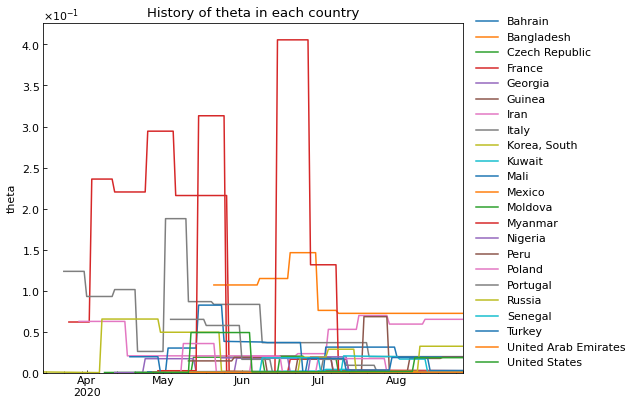

Country,Bahrain,Bangladesh,Czech Republic,France,Georgia,Guinea,Iran,Italy,"Korea, South",Kuwait,...,Myanmar,Nigeria,Peru,Poland,Portugal,Russia,Senegal,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-23,0.0025,0.001291,0.000936,0.002406,0.000163,0.000086,0.065054,0.019595,0.000287,0.000252,...,0.000659,0.000443,0.019025,0.001806,0.001087,0.03223,0.001149,0.002586,0.000679,0.0183
2020-08-24,0.0025,0.001291,0.000936,0.002406,0.000163,0.000086,0.065054,0.019595,0.000287,0.000252,...,0.000659,0.000443,0.019025,0.001806,0.001087,0.03223,0.001149,0.002586,0.000679,0.0183
2020-08-25,0.0025,0.001291,0.000936,0.002406,0.000163,0.000086,0.065054,0.019595,0.000287,0.000252,...,0.000659,0.000443,0.019025,0.001806,0.001087,0.03223,0.001149,0.002586,0.000679,0.0183
2020-08-26,0.0025,0.001291,0.000936,0.002406,0.000163,0.000086,0.065054,0.019595,0.000287,0.000252,...,0.000659,0.000443,0.019025,0.001806,0.001087,0.03223,0.001149,0.002586,0.000679,0.0183
2020-08-27,0.0025,0.001291,0.000936,0.002406,0.000163,0.000086,0.065054,0.019595,0.000287,0.000252,...,0.000659,0.000443,0.019025,0.001806,0.001087,0.03223,0.001149,0.002586,0.000679,0.0183


In [18]:
analyser.param_history("theta", roll_window=None).tail()

## (Experimental): Relationship of OxCGRT index and parameter values
Government responses will impact on parameter values of ODE models about 14 days later. Here, we will investigate on the relationship of [stringency index (from OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/index_methodology.md) and reproduction number/model parameters.


In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [20]:
df = analyser.track()
param_cols = ["Rt", *cs.SIRF.PARAMETERS]
oxcgrt_cols = oxcgrt_data.OXCGRT_VARS[:]
cols = param_cols + oxcgrt_cols
delay = 14

for col in param_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = df.groupby("Country")[col].shift(0 - delay)

df = df.dropna(how="any")
df = df.loc[:, ["Date", "Country", *cols]]
track_df = df.copy()
track_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31117 entries, 0 to 31424
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Date                                 31117 non-null  datetime64[ns]
 1   Country                              31117 non-null  object        
 2   Rt                                   31117 non-null  float64       
 3   theta                                31117 non-null  float64       
 4   kappa                                31117 non-null  float64       
 5   rho                                  31117 non-null  float64       
 6   sigma                                31117 non-null  float64       
 7   School_closing                       31117 non-null  int64         
 8   Workplace_closing                    31117 non-null  int64         
 9   Cancel_events                        31117 non-null  int64         
 10  Gatherings

In [21]:
# Correlation
df = track_df.copy()
df.corr().style.background_gradient(axis=None)

,Rt,theta,kappa,rho,sigma,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
Rt,1.000000,-0.170119,-0.006491,0.153479,-0.274422,-0.282716,-0.053441,0.070294,0.198737,-0.090546,0.005301,0.035541,-0.232148,0.024697,-0.063316,-0.234476,-0.091266
theta,-0.170119,1.000000,0.296233,0.105404,0.140049,0.133970,0.300052,0.097062,-0.001423,0.025165,-0.003243,0.060741,-0.025071,0.015112,-0.444347,-0.139617,0.278094
kappa,-0.006491,0.296233,1.000000,0.533249,0.313876,0.297403,0.450336,0.106460,-0.008506,0.117196,0.101419,0.064451,0.091699,-0.114559,-0.352645,-0.214081,0.344003
rho,0.153479,0.105404,0.533249,1.000000,0.629956,0.202470,0.121933,-0.128398,-0.101003,0.037314,0.068111,-0.000718,0.196466,-0.104262,-0.272678,-0.207972,0.179185
sigma,-0.274422,0.140049,0.313876,0.629956,1.000000,0.162806,-0.099411,-0.194303,-0.483250,-0.196110,-0.214148,-0.326732,0.100597,-0.161868,-0.320180,0.124882,-0.074475
School_closing,-0.282716,0.133970,0.297403,0.202470,0.162806,1.000000,0.546578,0.338759,0.108877,0.421654,0.438064,0.261841,0.521047,-0.035554,0.038462,-0.406359,0.637559
Workplace_closing,-0.053441,0.300052,0.450336,0.121933,-0.099411,0.546578,1.000000,0.396085,0.398259,0.457583,0.570640,0.485718,0.200398,-0.003537,0.044805,-0.476008,0.686952
Cancel_events,0.070294,0.097062,0.106460,-0.128398,-0.194303,0.338759,0.396085,1.000000,0.533490,0.359182,0.546686,0.382717,-0.004720,-0.014579,0.133611,-0.166429,0.532328
Gatherings_restrictions,0.198737,-0.001423,-0.008506,-0.101003,-0.483250,0.108877,0.398259,0.533490,1.000000,0.575475,0.653442,0.629742,0.113250,0.068103,0.294713,-0.246727,0.583631
Transport_closing,-0.090546,0.025165,0.117196,0.037314,-0.196110,0.421654,0.457583,0.359182,0.575475,1.000000,0.634693,0.750614,0.350625,-0.079456,0.073769,-0.249798,0.792568


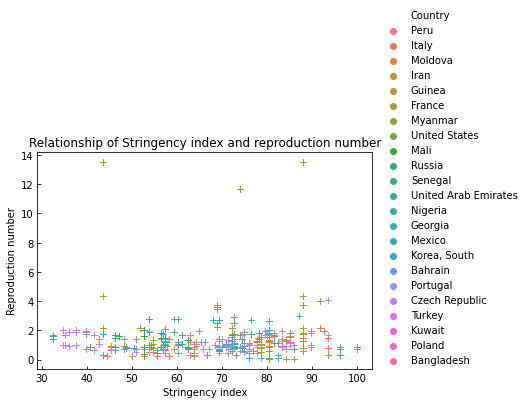

In [22]:
# Scatter plot of Stringency index and Rt
df = track_df.copy()
sns.scatterplot(data=df, x="Stringency_index", y="Rt", hue="Country", legend="brief", marker="+")
bbox_to_anchor=(1.02, 0)
bbox_loc="lower left"
plt.legend(bbox_to_anchor=bbox_to_anchor, loc=bbox_loc, borderaxespad=0)
plt.title("Relationship of Stringency index and reproduction number")
plt.ylabel("Reproduction number")
plt.xlabel("Stringency index")
plt.show()